<a href="https://colab.research.google.com/github/Chetan-Sagathiya/Movie-Recommendation-System/blob/master/movie_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
movies = pd.read_csv("https://raw.githubusercontent.com/deepak525/Investigate_TMDb_Movies/master/tmdb-movies.csv")
movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
movies.shape

(10866, 21)

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
def get_year(release_date):
  release_date = release_date.split('/')
  return release_date[2]

In [6]:
movies['year'] = movies['release_date'].apply(lambda x: get_year(x))

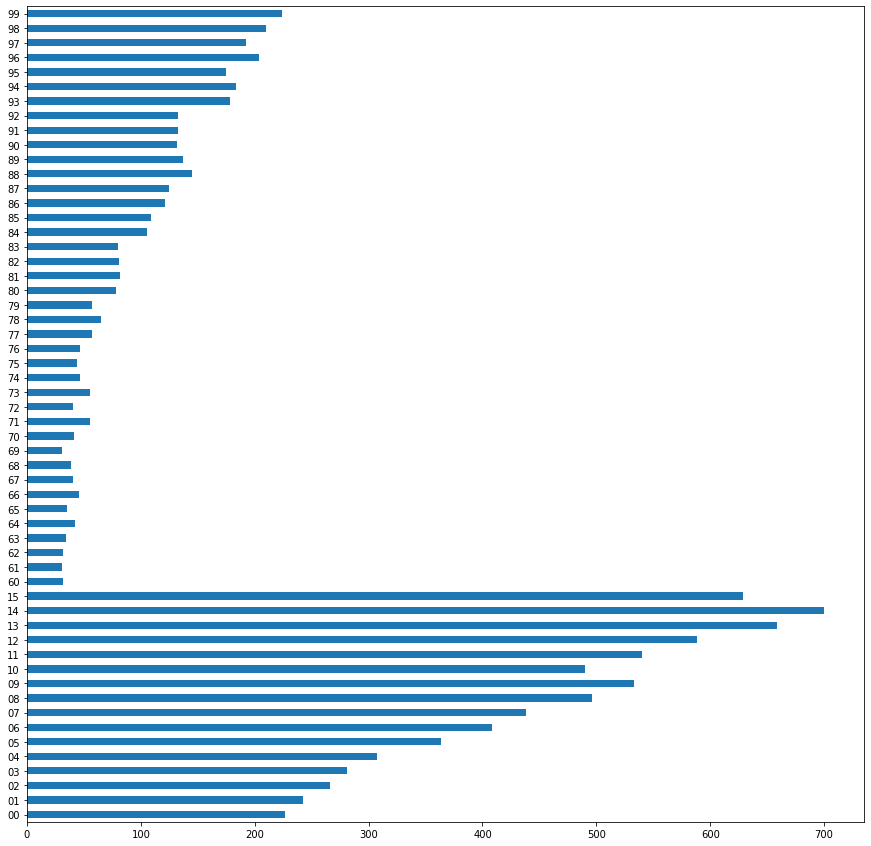

In [7]:
import matplotlib.pyplot as plt
movies.year.value_counts().sort_index().plot(kind='barh', figsize=(15,15))

In [8]:
data = movies[['original_title', 'cast', 'director', 'genres']]
data.head()

,original_title,cast,director,genres
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller


In [9]:
data.isnull().sum()

original_title     0
cast              76
director          44
genres            23
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data = data.reset_index()

In [12]:
data['genres'] = data['genres'].apply(lambda x: x.replace('|', ' '))

In [13]:
data['genres'][1].split('|')[2]

IndexError: ignored

In [14]:
def sci_fi(genres):
  lst = []
  genres = genres.split("|")
  for genre in genres:
    if genre == "Science Fiction":
      lst.append("Sci-fi")
    else:
      lst.append(genre)
  return ' '.join(lst)

In [15]:
data['genres'] = data['genres'].apply(lambda x: sci_fi(x))

In [16]:
data.head(2)

,index,original_title,cast,director,genres
0,0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action Adventure Science Fiction Thriller
1,1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action Adventure Science Fiction Thriller


In [17]:
def get_actor1(actors):
  actors = actors.split('|')
  return actors[0]

def get_actor2(actors):
  actors = actors.split('|')
  if len(actors) > 1:
    return actors[1]
  else:
    return 'unknown'
  
def get_actor3(actors):
  actors = actors.split('|')
  if len(actors) > 2:
    return actors[2]
  else:
    return 'unknown'


In [18]:
data['actor_1'] = data['cast'].apply(lambda x: get_actor1(x))
data['actor_2'] = data['cast'].apply(lambda x: get_actor2(x))
data['actor_3'] = data['cast'].apply(lambda x: get_actor3(x))

In [19]:
data.head()

,index,original_title,cast,director,genres,actor_1,actor_2,actor_3
0,0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action Adventure Science Fiction Thriller,Chris Pratt,Bryce Dallas Howard,Irrfan Khan
1,1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action Adventure Science Fiction Thriller,Tom Hardy,Charlize Theron,Hugh Keays-Byrne
2,2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure Science Fiction Thriller,Shailene Woodley,Theo James,Kate Winslet
3,3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action Adventure Science Fiction Fantasy,Harrison Ford,Mark Hamill,Carrie Fisher
4,4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action Crime Thriller,Vin Diesel,Paul Walker,Jason Statham


In [22]:
data['comb'] = data['director'] + ' ' + data['actor_1'] + ' ' + data['actor_2'] + ' ' + data['actor_3'] + ' ' + data['genres']

In [23]:
data.head(2)

,index,original_title,cast,director,genres,actor_1,actor_2,actor_3,comb
0,0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action Adventure Science Fiction Thriller,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Colin Trevorrow Chris Pratt Bryce Dallas Howar...
1,1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action Adventure Science Fiction Thriller,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,George Miller Tom Hardy Charlize Theron Hugh K...


In [25]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
count_matrix = cv.fit_transform(data['comb'])

In [34]:
cosine_sim = cosine_similarity(count_matrix)

In [36]:
cosine_sim

array([[1.        , 0.35714286, 0.3086067 , ..., 0.        , 0.08451543,
        0.        ],
       [0.35714286, 1.        , 0.3086067 , ..., 0.        , 0.08451543,
        0.07412493],
       [0.3086067 , 0.3086067 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.1       ,
        0.        ],
       [0.08451543, 0.08451543, 0.        , ..., 0.1       , 1.        ,
        0.        ],
       [0.        , 0.07412493, 0.        , ..., 0.        , 0.        ,
        1.        ]])